In [2]:
import pandas as pd
import numpy as np

In [3]:
data = "C:/Users/Douglas/Downloads/clean_auto.csv"
df = pd.read_csv(data)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,std-aspiration,turbo-aspiration
0,0,67.0,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,13495.0,11.190476,8.703704,Low,0,1,1,0
1,1,54.0,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,16500.0,11.190476,8.703704,Low,0,1,1,0
2,2,32.0,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,3,27.0,164,audi,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,13950.0,9.791667,7.833333,Low,0,1,1,0
4,4,NaN,164,audi,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,17450.0,13.055556,10.681818,Low,0,1,1,0


In [4]:
#using the groupby method to check the average price based on body-style and drive-wheels categories
data_test = df[['price', 'body-style', 'drive-wheels']]
grp_test = data_test.groupby(['body-style', 'drive-wheels'] ,as_index=False).mean()
grp_test

,body-style,drive-wheels,price
0,convertible,fwd,11595.000000
1,convertible,rwd,23949.600000
2,hardtop,fwd,8249.000000
3,hardtop,rwd,24202.714286
4,hatchback,4wd,7603.000000
5,hatchback,fwd,8396.387755
6,hatchback,rwd,14337.777778
7,sedan,4wd,12647.333333
8,sedan,fwd,9811.800000
9,sedan,rwd,21711.833333


In [5]:
#using the pivot table to further categorize the dataset
pivot_df = grp_test.pivot(index='drive-wheels', columns='body-style')
pivot_df


price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [6]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns


<AxesSubplot:xlabel='None-body-style', ylabel='drive-wheels'>

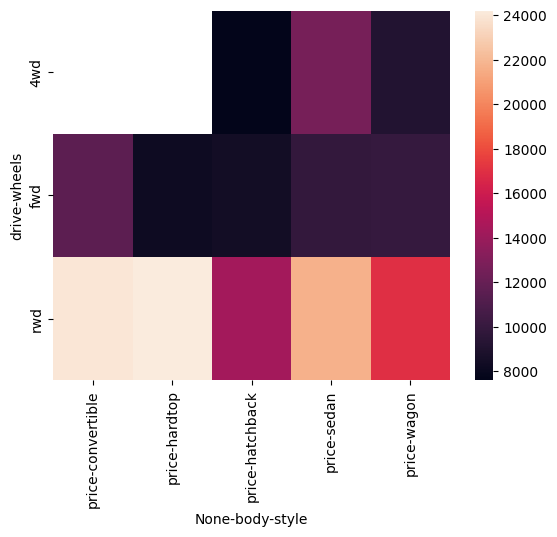

In [7]:
#Using heatmaps to plot the target varaiable over multiple variables
sns.heatmap(pivot_df)

<AxesSubplot:xlabel='engine-size', ylabel='price'>

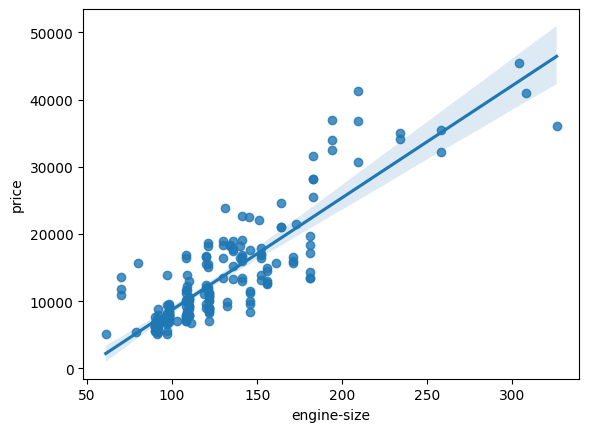

In [10]:
#correlation between 2 variables, engine size and price
sns.regplot(x='engine-size', y='price', data=df)


<AxesSubplot:xlabel='highway-L/100km', ylabel='price'>

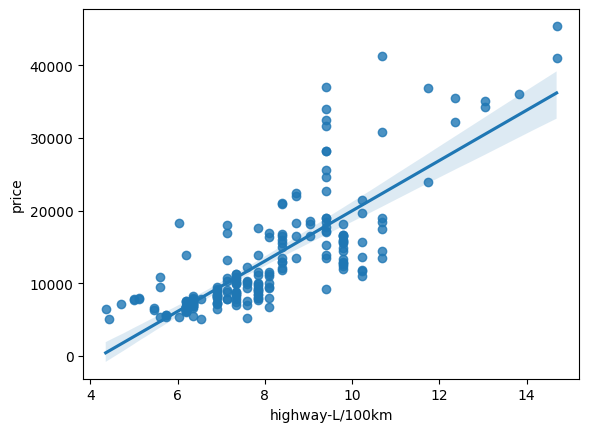

In [13]:
sns.regplot(x='highway-L/100km', y='price', data=df)

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

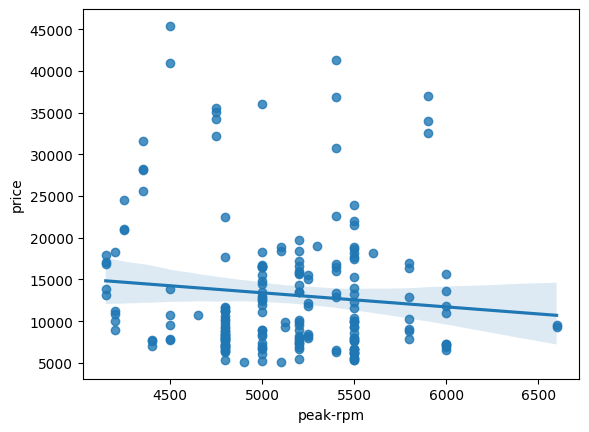

In [14]:
sns.regplot(x='peak-rpm', y='price', data=df)